In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Cargar las bases de datos
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

# Eliminar registros nulos en la columna 'Country_code'
df_covid_limpio = df_covid.dropna(subset=['Country_code'])

# Mantener solo las columnas especificadas
df_covid_limpio = df_covid_limpio[['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']]

# Sustituir valores nulos con cero
df_covid_limpio = df_covid_limpio.fillna(0)

# Cambiar el formato de la columna 'Date_reported'
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])

# Cambiar el formato de las columnas 'New_cases' y 'New_deaths' a int64
df_covid_limpio[['New_cases', 'New_deaths']] = df_covid_limpio[['New_cases', 'New_deaths']].astype('int64')

# Crear la nueva columna 'lethality_rate'
df_covid_limpio['lethality_rate'] = (df_covid_limpio['Cumulative_deaths'] / df_covid_limpio['Cumulative_cases']) * 100

# Filtrar registros eliminando outliers
lower_bound = df_covid_limpio['lethality_rate'].quantile(0)
upper_bound = df_covid_limpio['lethality_rate'].quantile(0.99)
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= lower_bound) & (df_covid_limpio['lethality_rate'] <= upper_bound)]

# Reiniciar el índice
df_covid_limpio = df_covid_limpio.reset_index(drop=True)

# Mostrar los primeros registros del dataframe resultante
df_covid_limpio.head()

In [2]:
# Cargar las bases de datos
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]



In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [5]:
# Eliminar registros nulos en la columna 'Country_code'
df_covid_limpio = df_covid.dropna(subset=['Country_code'])

In [6]:
# Mantener solo las columnas especificadas
df_covid_limpio = df_covid_limpio[['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']]


In [7]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          36436 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         24088 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [8]:
# Sustituir valores nulos con cero
df_covid_limpio = df_covid_limpio.fillna(0)

In [9]:
# Cambiar el formato de la columna 'Date_reported'
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])


In [10]:
# Cambiar el formato de las columnas 'New_cases' y 'New_deaths' a int64
df_covid_limpio[['New_cases', 'New_deaths']] = df_covid_limpio[['New_cases', 'New_deaths']].astype('int64')


In [11]:
# Crear la nueva columna 'lethality_rate'
df_covid_limpio['lethality_rate'] = (df_covid_limpio['Cumulative_deaths'] / df_covid_limpio['Cumulative_cases']) * 100


In [12]:
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,4.939600e+04,4.939600e+04,49396.000000,4.939600e+04,4.530700e+04
mean,1.567324e+04,1.643477e+06,142.040530,1.928293e+04,inf
std,2.408294e+05,7.274286e+06,875.025827,7.909933e+04,NaN
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.846750e+03,0.000000,2.900000e+01,5.128205e-01
50%,1.020000e+02,4.283250e+04,0.000000,4.980000e+02,1.181060e+00
75%,1.999250e+03,4.998840e+05,20.000000,6.630250e+03,2.160936e+00
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,inf


In [13]:
# Filtrar registros eliminando outliers
lower_bound = df_covid_limpio['lethality_rate'].quantile(0)
upper_bound = df_covid_limpio['lethality_rate'].quantile(0.99)
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= lower_bound) & (df_covid_limpio['lethality_rate'] <= upper_bound)]


In [14]:
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,4.485300e+04,4.485300e+04,44853.000000,4.485300e+04,44853.000000
mean,1.722128e+04,1.809406e+06,151.147125,2.114609e+04,1.595293
std,2.526782e+05,7.614161e+06,905.888414,8.276044e+04,1.666892
min,-6.507900e+04,1.000000e+00,-3432.000000,0.000000e+00,0.000000
25%,5.000000e+00,8.173000e+03,0.000000,7.300000e+01,0.504360
50%,1.720000e+02,6.399300e+04,1.000000,8.030000e+02,1.164988
75%,2.624000e+03,6.263340e+05,26.000000,7.975000e+03,2.126546
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,12.776413


In [17]:
# https://www.worldometers.info/coronavirus/worldwide-graphs/
# https://data.who.int/dashboards/covid19/cases
# https://population.un.org/wpp/Graphs/DemographicProfiles/Line/900
    

<AxesSubplot:>

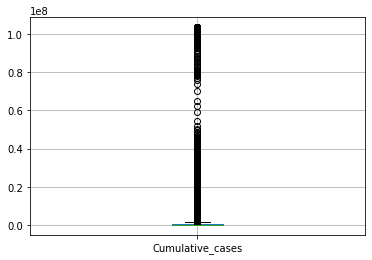

In [15]:
df_covid_limpio.boxplot(['Cumulative_cases'])

<AxesSubplot:>

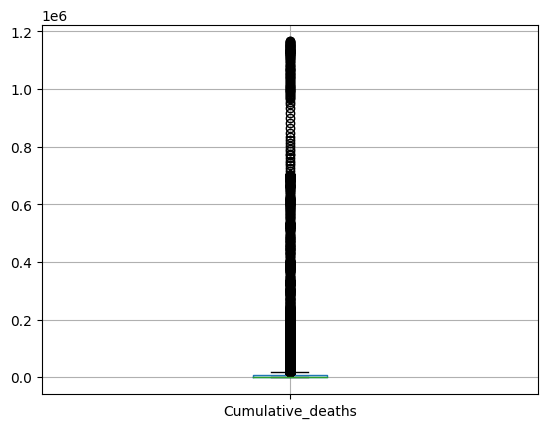

In [16]:
df_covid_limpio.boxplot(['Cumulative_deaths'])

<AxesSubplot:>

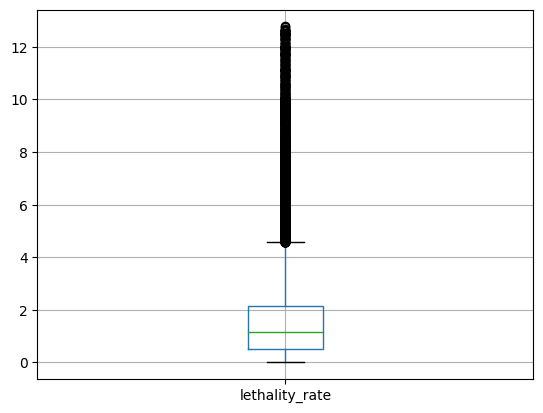

In [18]:
df_covid_limpio.boxplot(['lethality_rate'])

In [ ]:
# Reiniciar el índice
df_covid_limpio = df_covid_limpio.reset_index(drop=True)


In [ ]:
df_covid_limpio.head()